# Sentiments Analysis of Moroccans during the 2nd and 3rd wave of covid-19

### Task
+ Text Processing.
+ Keyword Extraction.
+ Entity Extraction.

## Debut

### Dataset 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas.util.testing as tm

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [2]:
# Load Dataset
df = pd.read_csv("data.csv")

In [3]:
# Preview
df.head()

,_type,url,date,content,renderedContent,id,user,replyCount,retweetCount,likeCount,...,media,retweetedTweet,quotedTweet,inReplyToTweetId,inReplyToUser,mentionedUsers,coordinates,place,hashtags,cashtags
0,snscrape.modules.twitter.Tweet,https://twitter.com/TheJackSullivan/status/139...,2021-05-31 23:56:07+00:00,England has reported 0 coronavirus deaths toda...,England has reported 0 coronavirus deaths toda...,1399515061396328458,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,NaN,NaN,"{'_type': 'snscrape.modules.twitter.Tweet', 'u...",NaN,NaN,NaN,{'_type': 'snscrape.modules.twitter.Coordinate...,"{'_type': 'snscrape.modules.twitter.Place', 'f...",['EnoughIsEnough'],NaN
1,snscrape.modules.twitter.Tweet,https://twitter.com/CordeliaAppleb1/status/139...,2021-05-31 22:53:09+00:00,My son hasn't been to school for 14 months. If...,My son hasn't been to school for 14 months. If...,1399499217077407749,"{'_type': 'snscrape.modules.twitter.User', 'us...",2,12,38,...,NaN,NaN,NaN,NaN,NaN,"[{'_type': 'snscrape.modules.twitter.User', 'u...",{'_type': 'snscrape.modules.twitter.Coordinate...,"{'_type': 'snscrape.modules.twitter.Place', 'f...","['safeschools', 'ReleaseTheDataOnSchools']",NaN
2,snscrape.modules.twitter.Tweet,https://twitter.com/BirchyN85/status/139949822...,2021-05-31 22:49:12+00:00,Third wave though...! 🤔🤔🤔 https://t.co/WLUKqKSUjl,Third wave though...! 🤔🤔🤔 twitter.com/Politics...,1399498222478016514,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,NaN,NaN,"{'_type': 'snscrape.modules.twitter.Tweet', 'u...",NaN,NaN,NaN,{'_type': 'snscrape.modules.twitter.Coordinate...,"{'_type': 'snscrape.modules.twitter.Place', 'f...",NaN,NaN
3,snscrape.modules.twitter.Tweet,https://twitter.com/AdamWilson55/status/139949...,2021-05-31 22:27:39+00:00,@EssexPR 3rd wave my arse!! Give us our lives ...,@EssexPR 3rd wave my arse!! Give us our lives ...,1399492799700115458,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,13,...,NaN,NaN,NaN,1.399482e+18,"{'_type': 'snscrape.modules.twitter.User', 'us...","[{'_type': 'snscrape.modules.twitter.User', 'u...",{'_type': 'snscrape.modules.twitter.Coordinate...,"{'_type': 'snscrape.modules.twitter.Place', 'f...",NaN,NaN
4,snscrape.modules.twitter.Tweet,https://twitter.com/teresak20/status/139949136...,2021-05-31 22:21:58+00:00,3rd wave ! Bollocks.,3rd wave ! Bollocks.,1399491368628768769,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,{'_type': 'snscrape.modules.twitter.Coordinate...,"{'_type': 'snscrape.modules.twitter.Place', 'f...",NaN,NaN


### Task
#### Text
+ Text Preprocessing
+ Sentiment Analysis
+ Keyword Extraction
+ Entity Extraction

In [4]:
# Check Columns
df.columns

Index(['_type', 'url', 'date', 'content', 'renderedContent', 'id', 'user',
       'replyCount', 'retweetCount', 'likeCount', 'quoteCount',
       'conversationId', 'lang', 'source', 'sourceUrl', 'sourceLabel',
       'outlinks', 'tcooutlinks', 'media', 'retweetedTweet', 'quotedTweet',
       'inReplyToTweetId', 'inReplyToUser', 'mentionedUsers', 'coordinates',
       'place', 'hashtags', 'cashtags'],
      dtype='object')

In [5]:
# Datatype
df.dtypes

_type                object
url                  object
date                 object
content              object
renderedContent      object
id                    int64
user                 object
replyCount            int64
retweetCount          int64
likeCount             int64
quoteCount            int64
conversationId        int64
lang                 object
source               object
sourceUrl            object
sourceLabel          object
outlinks             object
tcooutlinks          object
media                object
retweetedTweet      float64
quotedTweet          object
inReplyToTweetId    float64
inReplyToUser        object
mentionedUsers       object
coordinates          object
place                object
hashtags             object
cashtags             object
dtype: object

### Test Analysis of tweet 

In [6]:
# Load Text Cleaning Package
import neattext.functions as nfx

In [7]:
# Methods/Attrib
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

### Noise
+ remove mentions/userhandles
+ remove hashtags
+ urls
+ emojis
+ special char

In [8]:
# Cleaning Text
df['clean_tweet'] = df['content'].apply(nfx.remove_hashtags)
df['clean_tweet'] = df['clean_tweet'].apply(lambda x: nfx.remove_userhandles(x))
df['clean_tweet'] = df['clean_tweet'].apply(nfx.remove_multiple_spaces)
df['clean_tweet'] = df['clean_tweet'].apply(nfx.remove_urls)
df['clean_tweet'] = df['clean_tweet'].apply(nfx.remove_puncts)
df['clean_tweet'] = df['clean_tweet'].apply(nfx.remove_emojis)
df['clean_tweet'] = df['clean_tweet'].apply(nfx.remove_stopwords)

In [9]:
df[['content','clean_tweet']].iloc[14:23]

,content,clean_tweet
14,Tired of the thousands of faceless accounts th...,Tired thousands faceless accounts throwing thr...
15,💔\n\nBBC News - Coronavirus: The Indian childr...,BBC News Coronavirus: Indian children orphaned...
16,"Soon, a MBA in your CV will be more a penalty...",Soon MBA CV penalty advangte Covid19 speed end...
17,@_Matthewbailey @Michael58271230 @Pageylcfc Bu...,stop dead wave right
18,Honest to God not sure I can cope with another...,Honest God sure cope lockdown Especially new w...
19,"I may be going mad, but that circle seems to b...",going mad circle placed strategically highligh...
20,Correct. So fucking give me the “wave” when I ...,Correct fucking “wave” way
21,#WHO adopts the Greek alphabet to denote Covid...,adopts Greek alphabet denote Covid19 virus var...
22,.@jemgilbert and @timlawrenceinfo make the con...,connections dub Krautrock Teo Macero’s tape ex...


### Sentiment Aanalysis

In [10]:
from textblob import TextBlob

In [11]:
def get_sentiment(text):
    blob = TextBlob(text)
    sentiment_polarity = blob.sentiment.polarity
    sentiment_subjectivity = blob.sentiment.subjectivity
    if sentiment_polarity > 0:
        sentiment_label = 'Positive'
    elif sentiment_polarity < 0:
        sentiment_label = 'Negative'
    else:
        sentiment_label = 'Neutral'
    result = {'polarity':sentiment_polarity,
              'subjectivity':sentiment_subjectivity,
              'sentiment':sentiment_label}
    return result

In [12]:
df['sentiment_results'] = df['clean_tweet'].apply(get_sentiment)

In [13]:
df['sentiment_results']

0        {'polarity': 0.0, 'subjectivity': 0.0, 'sentim...
1        {'polarity': -0.04999999999999999, 'subjectivi...
2        {'polarity': 0.0, 'subjectivity': 0.0, 'sentim...
3        {'polarity': 0.0, 'subjectivity': 0.0, 'sentim...
4        {'polarity': 0.0, 'subjectivity': 0.0, 'sentim...
                               ...                        
18766    {'polarity': 0.0, 'subjectivity': 0.0, 'sentim...
18767    {'polarity': 0.0, 'subjectivity': 0.8, 'sentim...
18768    {'polarity': -0.3, 'subjectivity': 0.35, 'sent...
18769    {'polarity': 0.9, 'subjectivity': 1.0, 'sentim...
18770    {'polarity': -0.1, 'subjectivity': 0.1, 'senti...
Name: sentiment_results, Length: 18771, dtype: object

In [14]:
df['sentiment_results'].iloc[5]

{'polarity': 0.0, 'subjectivity': 0.0, 'sentiment': 'Neutral'}

In [15]:
pd.json_normalize(df['sentiment_results'].iloc[5])

,polarity,subjectivity,sentiment
0,0.0,0.0,Neutral


In [16]:
df = df.join(pd.json_normalize(df['sentiment_results']))

In [17]:
df.head()

,_type,url,date,content,renderedContent,id,user,replyCount,retweetCount,likeCount,...,mentionedUsers,coordinates,place,hashtags,cashtags,clean_tweet,sentiment_results,polarity,subjectivity,sentiment
0,snscrape.modules.twitter.Tweet,https://twitter.com/TheJackSullivan/status/139...,2021-05-31 23:56:07+00:00,England has reported 0 coronavirus deaths toda...,England has reported 0 coronavirus deaths toda...,1399515061396328458,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,NaN,{'_type': 'snscrape.modules.twitter.Coordinate...,"{'_type': 'snscrape.modules.twitter.Place', 'f...",['EnoughIsEnough'],NaN,England reported 0 coronavirus deaths today de...,"{'polarity': 0.0, 'subjectivity': 0.0, 'sentim...",0.00,0.0000,Neutral
1,snscrape.modules.twitter.Tweet,https://twitter.com/CordeliaAppleb1/status/139...,2021-05-31 22:53:09+00:00,My son hasn't been to school for 14 months. If...,My son hasn't been to school for 14 months. If...,1399499217077407749,"{'_type': 'snscrape.modules.twitter.User', 'us...",2,12,38,...,"[{'_type': 'snscrape.modules.twitter.User', 'u...",{'_type': 'snscrape.modules.twitter.Coordinate...,"{'_type': 'snscrape.modules.twitter.Place', 'f...","['safeschools', 'ReleaseTheDataOnSchools']",NaN,son hasnt school 14 months wave wont able sixt...,"{'polarity': -0.04999999999999999, 'subjectivi...",-0.05,0.8125,Negative
2,snscrape.modules.twitter.Tweet,https://twitter.com/BirchyN85/status/139949822...,2021-05-31 22:49:12+00:00,Third wave though...! 🤔🤔🤔 https://t.co/WLUKqKSUjl,Third wave though...! 🤔🤔🤔 twitter.com/Politics...,1399498222478016514,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,NaN,{'_type': 'snscrape.modules.twitter.Coordinate...,"{'_type': 'snscrape.modules.twitter.Place', 'f...",NaN,NaN,wave 🤔🤔🤔,"{'polarity': 0.0, 'subjectivity': 0.0, 'sentim...",0.00,0.0000,Neutral
3,snscrape.modules.twitter.Tweet,https://twitter.com/AdamWilson55/status/139949...,2021-05-31 22:27:39+00:00,@EssexPR 3rd wave my arse!! Give us our lives ...,@EssexPR 3rd wave my arse!! Give us our lives ...,1399492799700115458,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,13,...,"[{'_type': 'snscrape.modules.twitter.User', 'u...",{'_type': 'snscrape.modules.twitter.Coordinate...,"{'_type': 'snscrape.modules.twitter.Place', 'f...",NaN,NaN,3rd wave arse lives,"{'polarity': 0.0, 'subjectivity': 0.0, 'sentim...",0.00,0.0000,Neutral
4,snscrape.modules.twitter.Tweet,https://twitter.com/teresak20/status/139949136...,2021-05-31 22:21:58+00:00,3rd wave ! Bollocks.,3rd wave ! Bollocks.,1399491368628768769,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,1,...,NaN,{'_type': 'snscrape.modules.twitter.Coordinate...,"{'_type': 'snscrape.modules.twitter.Place', 'f...",NaN,NaN,3rd wave Bollocks,"{'polarity': 0.0, 'subjectivity': 0.0, 'sentim...",0.00,0.0000,Neutral


In [18]:
df['sentiment'].value_counts()

Positive    8227
Neutral     6642
Negative    3902
Name: sentiment, dtype: int64

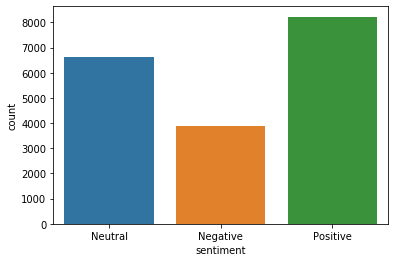

In [19]:
# Plot with seaborn
sns.countplot(df['sentiment'])

### Keyword Extraction
+ For Positive and Negative Sentiment
+ General

In [20]:
positive_tweet = df[df['sentiment'] == 'Positive']['clean_tweet']
neutral_tweet = df[df['sentiment'] == 'Neutral']['clean_tweet']
negative_tweet = df[df['sentiment'] == 'Negative']['clean_tweet']

In [21]:
positive_tweet

7                             Didnt time Surely forth wave
10       like long overdue Thanks making lives easier U...
16       Soon MBA CV penalty advangte Covid19 speed end...
17                                    stop dead wave right
18       Honest God sure cope lockdown Especially new w...
                               ...                        
18755    WANNA DRIVE BEACH I’m sensible staying home (b...
18756                                        science clear
18760    Avoid New Coronavirus Variant Right arrival va...
18762    Beautiful flowers hand cream celebrate end wee...
18769                                            Brilliant
Name: clean_tweet, Length: 8227, dtype: object

In [22]:
# Convert to Tokens
positive_tweet_list = positive_tweet.tolist()

In [23]:
negative_tweet_list = negative_tweet.tolist()
neutral_tweet_list = neutral_tweet.tolist()

In [24]:
# Tokenization
pos_tokens = [token for line in positive_tweet_list  for token in line.split()]
neg_tokens = [token for line in negative_tweet_list  for token in line.split()]
neut_tokens = [token for line in neutral_tweet_list  for token in line.split()]

In [25]:
pos_tokens[1:30]

['time',
 'Surely',
 'forth',
 'wave',
 'like',
 'long',
 'overdue',
 'Thanks',
 'making',
 'lives',
 'easier',
 'UN',
 'agency',
 'says',
 'aim',
 'avoid',
 'stigmatising',
 'countries',
 'coronavirus',
 'varian',
 'Soon',
 'MBA',
 'CV',
 'penalty',
 'advangte',
 'Covid19',
 'speed',
 'end',
 'High']

In [26]:
# Get Most Commonest Keywords
from collections import Counter

In [27]:
def get_tokens(docx,num=30):
    word_tokens = Counter(docx)
    most_common = word_tokens.most_common(num)
    result = dict(most_common)
    return result

In [28]:
get_tokens(pos_tokens)

{'wave': 1341,
 'amp': 1275,
 'people': 767,
 'new': 656,
 'coronavirus': 600,
 'vaccine': 574,
 'year': 448,
 'Covid19': 446,
 'today': 426,
 'UK': 411,
 'time': 401,
 'like': 387,
 'good': 383,
 'pandemic': 373,
 'work': 366,
 'Coronavirus': 320,
 'COVID19': 316,
 'need': 310,
 'day': 304,
 'great': 301,
 'safe': 300,
 'corona': 285,
 'cases': 279,
 'Corona': 254,
 'know': 247,
 'right': 239,
 'support': 234,
 'Great': 233,
 'Im': 225,
 'world': 221}

In [29]:
most_common_pos_words = get_tokens(pos_tokens)
most_common_neg_words = get_tokens(neg_tokens)
most_common_neut_words = get_tokens(neut_tokens)

In [30]:
neg_df = pd.DataFrame(most_common_neg_words.items(),columns=['words','scores'])

In [31]:
neg_df

,words,scores
0,wave,715
1,people,546
2,amp,473
3,coronavirus,356
4,time,244
5,Covid19,243
6,like,242
7,year,218
8,UK,211
9,pandemic,205


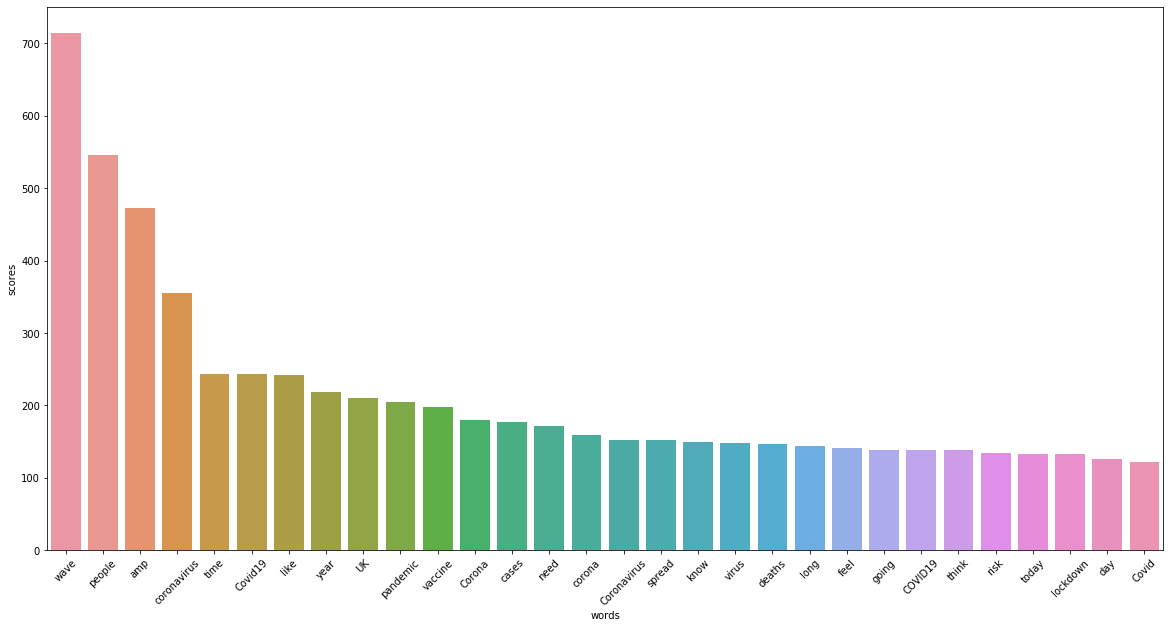

In [32]:
# Plot with seaborn
plt.figure(figsize=(20,10))
sns.barplot(x='words',y='scores',data=neg_df)
plt.xticks(rotation=45)
plt.show()

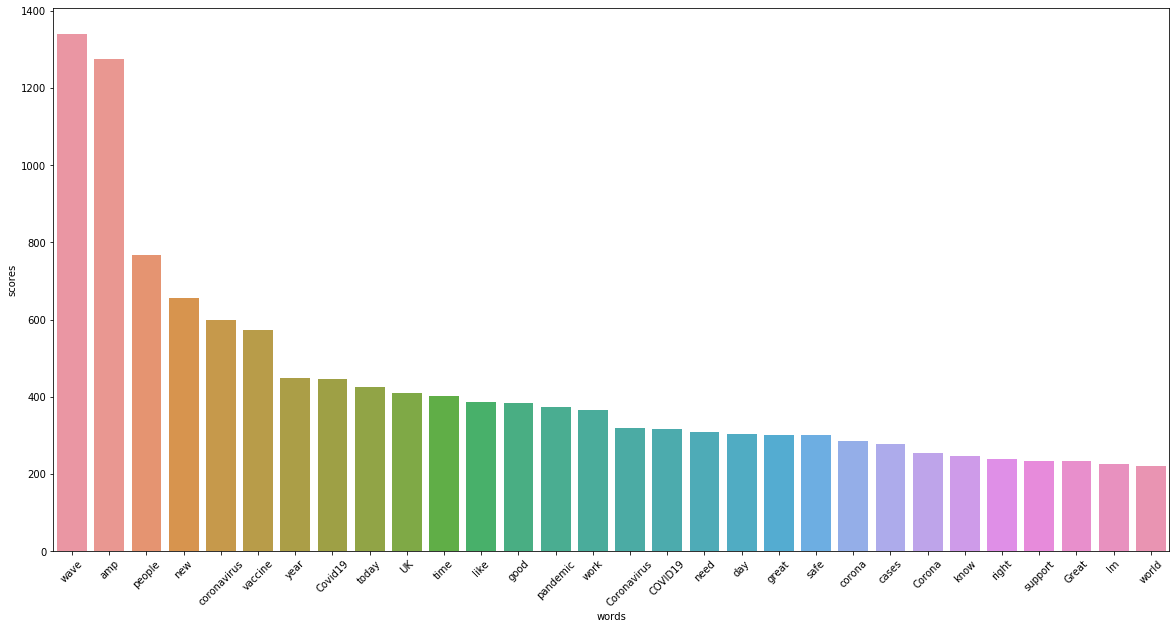

In [33]:
# Plot with seaborn
pos_df = pd.DataFrame(most_common_pos_words.items(),columns=['words','scores'])
plt.figure(figsize=(20,10))
sns.barplot(x='words',y='scores',data=pos_df)
plt.xticks(rotation=45)
plt.show()

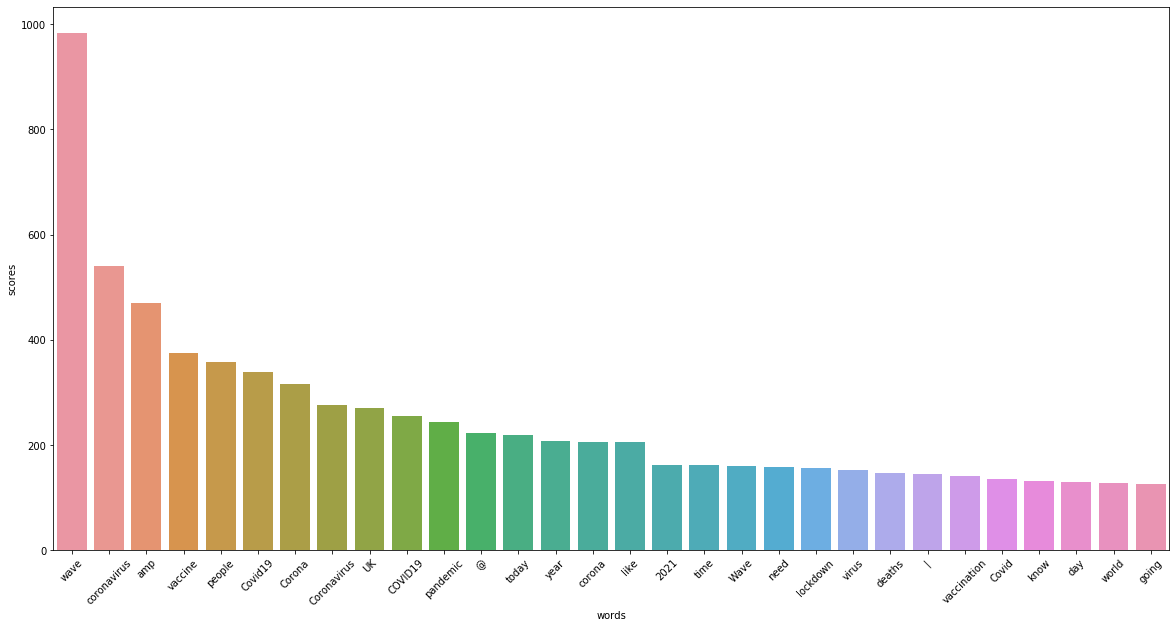

In [34]:
# Plot with seaborn
neut_df = pd.DataFrame(most_common_neut_words.items(),columns=['words','scores'])
plt.figure(figsize=(20,10))
sns.barplot(x='words',y='scores',data=neut_df)
plt.xticks(rotation=45)
plt.show()

In [35]:
### Word Cloud
from wordcloud import WordCloud

In [41]:
def plot_wordcloud(docx):
    plt.figure(figsize=(20,10))
    mywordcloud = WordCloud(background_color="white").generate(docx)
    plt.imshow(mywordcloud,interpolation='bilinear')
    plt.axis('off')
    plt.show()

In [37]:
pos_docx = ' '.join(pos_tokens)
neg_docx = ' '.join(neg_tokens)
neu_docx = ' '.join(neut_tokens)

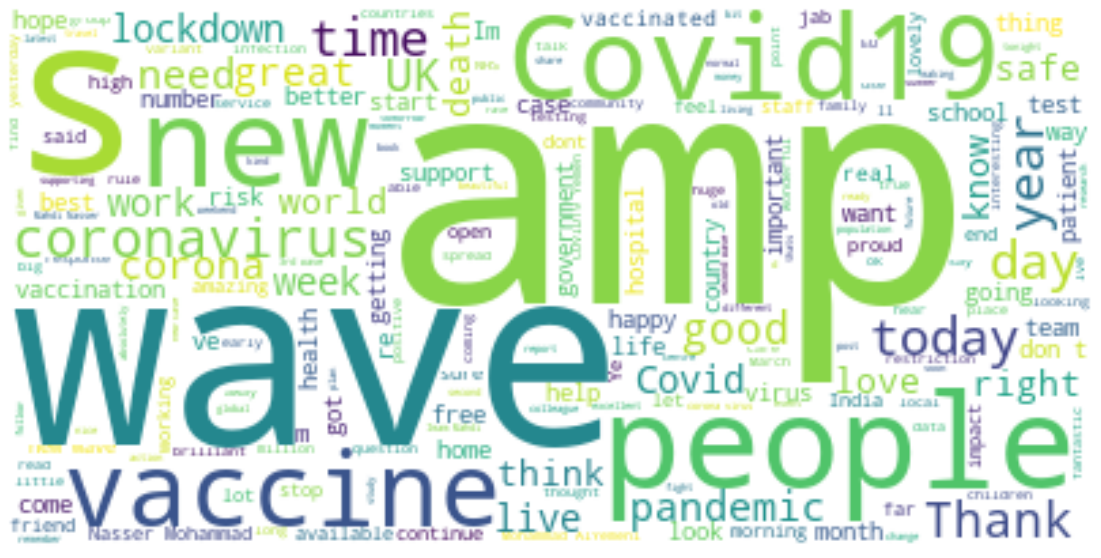

In [38]:
plot_wordcloud(pos_docx)

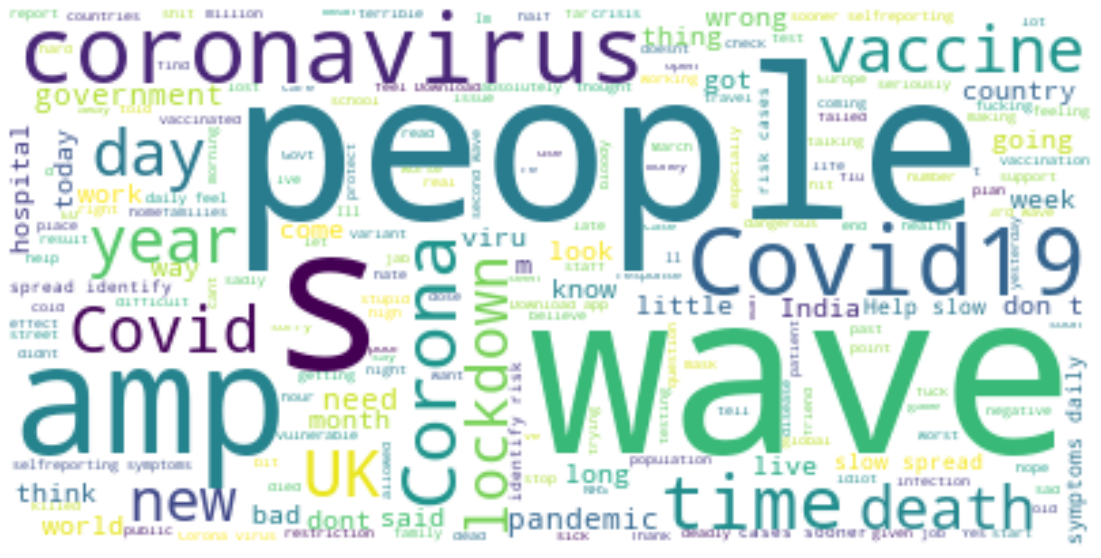

In [39]:
plot_wordcloud(neg_docx)

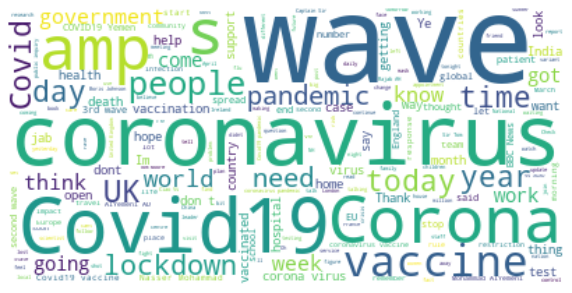

In [42]:
plot_wordcloud(neu_docx)